In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
categories = ['Accessories', 'Electronics', 'Office', 'Men\'s', 'Women\'s', 'Shop by Brand']
category = categories[0]

In [35]:
df = pd.read_csv('data_modeling.csv')
df = df[df['category'] == category]
df = df.drop('category', axis=1)
df['total_transactions'] = df['total_transactions'].astype('float')

df['date'] = pd.to_datetime(df['date'])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 340
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   341 non-null    datetime64[ns]
 1   total_hits                             341 non-null    float64       
 2   total_visits                           341 non-null    float64       
 3   total_page_views                       341 non-null    float64       
 4   total_first_visits                     341 non-null    float64       
 5   total_time_on_site                     341 non-null    float64       
 6   avg_time_on_site                       341 non-null    float64       
 7   total_transactions                     341 non-null    float64       
 8   total_revenue                          341 non-null    float64       
 9   avg_revenue                            341 non-null    float64   

,date,total_hits,total_visits,total_page_views,total_first_visits,total_time_on_site,avg_time_on_site,total_transactions,total_revenue,avg_revenue,...,medium_not_set,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,action_Check_out,action_Click_through_of_product_lists,action_Completed_purchase,action_Product_detail_views
0,2016-08-01,4566.333333,89.000000,3027.666667,33.000000,87104.333333,563.195850,62.0,4.377900e+09,7.061129e+07,...,0,0,3,3,57,14,0,146,0,121
1,2016-08-02,5619.666667,94.666667,3713.000000,40.333333,107344.333333,815.891196,30.0,1.889760e+09,7.268308e+07,...,0,0,14,0,102,2,0,151,0,133
2,2016-08-03,6343.333333,113.666667,4077.000000,58.666667,116221.333333,986.585195,0.0,0.000000e+00,0.000000e+00,...,0,0,15,2,140,6,0,179,0,162
3,2016-08-04,5006.666667,95.666667,3549.333333,102.500000,141102.666667,805.315385,4.0,3.668000e+08,9.170000e+07,...,0,8,2,0,93,13,0,152,0,135
4,2016-08-05,6448.000000,110.000000,4578.333333,105.000000,139769.333333,799.491296,85.0,1.197126e+10,1.515349e+08,...,0,7,20,0,192,0,0,180,0,150


In [36]:
# Time splitting 
n_days = 90
max_date = df['date'].max()
cutoff = max_date - pd.to_timedelta(n_days, unit='d')

test = df[df['date'] <= cutoff]
train = df[df['date'] > cutoff]

test = test.set_index('date')
train = train.set_index('date')

In [42]:
# Preparation
test_target = test[['total_revenue']]
test_fields = test.drop(['total_revenue', 'avg_revenue', 'total_transactions'], axis=1)


train_target = train[['total_revenue']]
train_fields = train.drop(['total_revenue', 'avg_revenue', 'total_transactions'], axis=1)

In [43]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=123)

# model = GridSearchCV(estimator=xgb_reg, 
#                              param_grid=dict(learning_rate=[0.01, 0.1, 0.3, 0.5]),
#                              scoring='neg_mean_absolute_error',
#                              refit=True,
#                              cv=5)

# model.fit(train_fields, train_target)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='neg_mean_absolute_error')

In [59]:
# print("Best score: ", model.best_score_)
# print("Best params: ", model.best_params_)
# print("Best estimator: \n", model.best_estimator_)

Best score:  -984919576.9544973
Best params:  {'learning_rate': 0.01}
Best estimator: 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)


In [84]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(train_fields, train_target.values.reshape(-1, ))

RandomForestRegressor(random_state=42)

<Axes: >

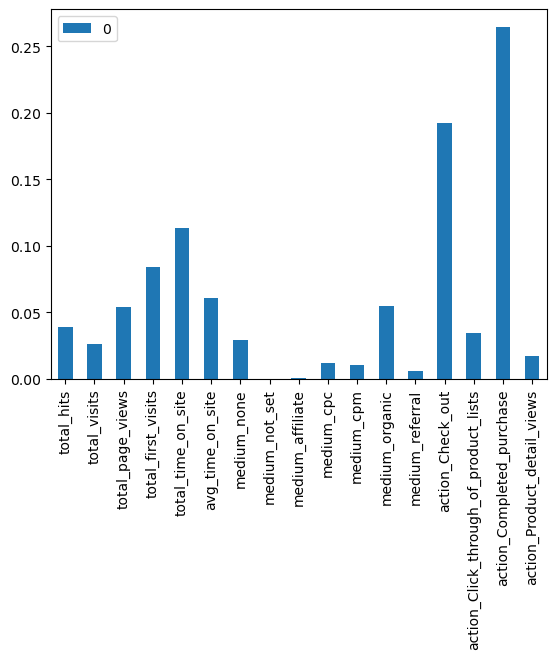

In [74]:
# imp_feat_reg = model\
#                 .best_estimator_\
#                 .get_booster()\
#                 .get_score(importance_type='gain')

imp_feat_reg = model.feature_importances_

# pd.DataFrame.from_dict(imp_feat_reg, orient='index').plot(kind='bar')
# plt.show()
pd.DataFrame(imp_feat_reg.reshape(1, -1), columns=train_fields.columns).T.plot(kind='bar')

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

predictions_reg = model.predict(test_fields)
predictions_reg = pd.DataFrame(predictions_reg, index=test.index, columns=['pred_total_revenue'])

# Calculate performance metrics
mse = mean_squared_error(test_target, predictions_reg)
r2 = r2_score(test_target, predictions_reg)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

df_pred = pd.merge(test_target, predictions_reg, left_index=True, right_index=True)
df_pred

Mean Squared Error: 7.478746443157641e+18
R^2 Score: -0.9102658399826993


,total_revenue,pred_total_revenue
date,,
2016-08-01,4.377900e+09,2.533989e+09
2016-08-02,1.889760e+09,2.757827e+09
2016-08-03,0.000000e+00,3.003203e+09
2016-08-04,3.668000e+08,2.802602e+09
2016-08-05,1.197126e+10,2.828253e+09
...,...,...
2017-04-29,2.337900e+08,3.771450e+08
2017-04-30,5.153600e+08,5.611621e+08
2017-05-01,1.214295e+09,1.685769e+09


In [86]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.line(df_pred.resample('M').mean(), labels={'value': 'Total Revenue'})
fig.show()

In [91]:
df_result = df_pred.reset_index().copy()
df_result['category'] = [category] * df_pred.shape[0]

df_result.to_csv(f'prediction-revenue-{category}.csv', index=False)